In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
data = pd.read_csv('STATA.csv', na_filter=False)
data.head()

,Hamlet,Household_ID,Container_ID,Container_position,Water_level,Lid,Fish,Meso,Micronecta,Source,Treatment,Larvae,count_larvae,Full count_pupae
0,0,1,1,0,25,1,0,0,0,0,0,1,206.7,51.6
1,0,2,2,1,25,1,0,0,0,1,2,0,0.0,3.0
2,0,2,5,0,25,0,0,0,0,1,2,0,0.0,0.0
3,0,2,6,0,25,1,0,0,0,0,1,0,0.0,0.0
4,0,3,5,1,30,1,0,0,0,0,1,0,0.0,0.0


In [4]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

In [5]:
feature_cols = ['Hamlet', 'Container_position', 'Water_level', 'Lid', 'Source', 'Meso']
X = data[feature_cols]
print X.shape

(550, 6)


(0, 200)

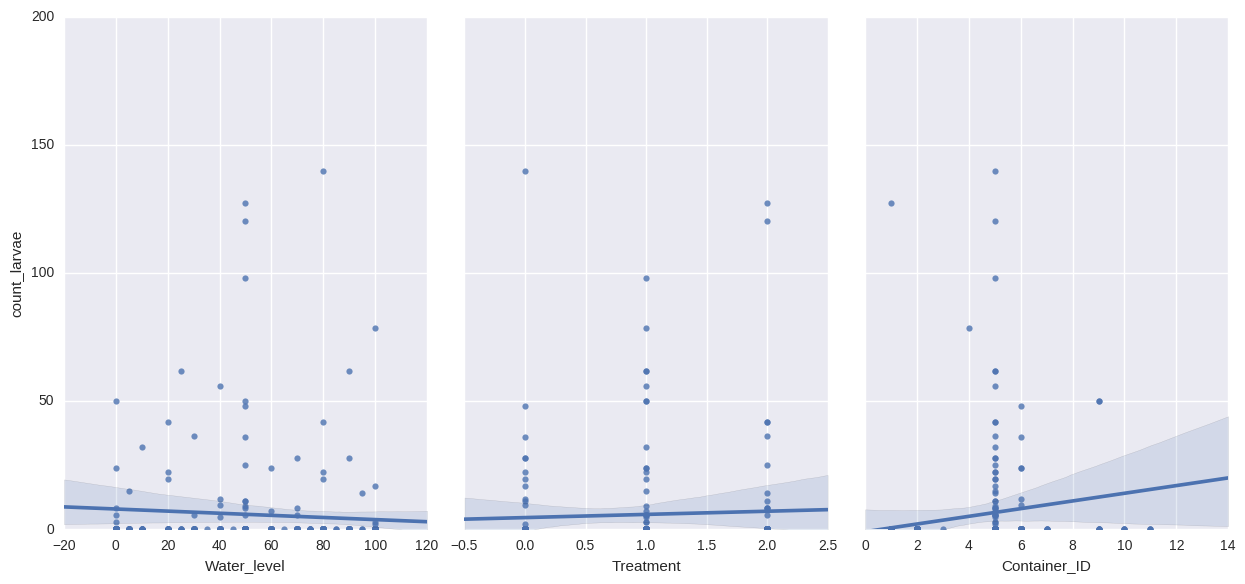

In [6]:
import seaborn as sns
sns.pairplot(data, x_vars=['Water_level','Treatment','Container_ID'], y_vars='count_larvae', size=6, aspect=0.7, kind='reg')
sns.plt.ylim(0,200)

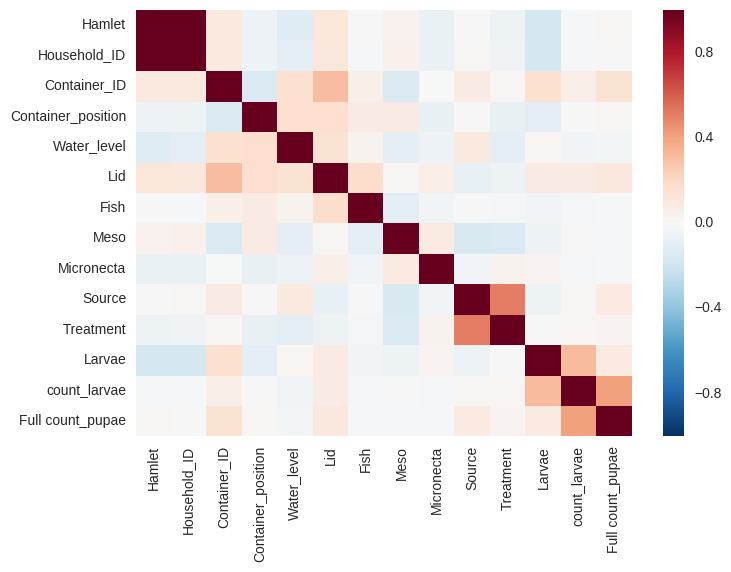

In [7]:
sns.heatmap(data.corr())

In [8]:
y = data['Larvae']
print y.shape

(550,)


In [9]:
B = data['count_larvae']
print B.shape

(550,)


In [10]:
print type(X)
print type(X.values)
print X.head()

<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>
   Hamlet  Container_position  Water_level  Lid  Source  Meso
0       0                   0           25    1       0     0
1       0                   1           25    1       1     0
2       0                   0           25    0       1     0
3       0                   0           25    1       0     0
4       0                   1           30    1       0     0


In [11]:
print type(y)
print type(y.values)
y.head()

<class 'pandas.core.series.Series'>
<type 'numpy.ndarray'>


0    1
1    0
2    0
3    0
4    0
Name: Larvae, dtype: int64

In [12]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=7, p=2,
          weights='uniform')

In [13]:
#CROSS VALIDATION

In [14]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [15]:
import numpy as np
print X.head()

   Hamlet  Container_position  Water_level  Lid  Source  Meso
0       0                   0           25    1       0     0
1       0                   1           25    1       1     0
2       0                   0           25    0       1     0
3       0                   0           25    1       0     0
4       0                   1           30    1       0     0


In [16]:
Columndata = []
Values = X.values
print Values


[[ 0  0 25  1  0  0]
 [ 0  1 25  1  1  0]
 [ 0  0 25  0  1  0]
 ..., 
 [10  1 80  0  0  0]
 [10  0 20  1  0  0]
 [10  1 60  0  0  0]]


In [17]:
import numpy as np
from sklearn.cross_validation import KFold
kf = KFold(20, n_folds=5)

print '{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations')
for iteration, data in enumerate(kf, start=1):
    print '{:^9} {} {:^25}'.format(iteration, data[0], data[1]) 

Iteration                   Training set observations                   Testing set observations
    1     [ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]         [0 1 2 3]        
    2     [ 0  1  2  3  8  9 10 11 12 13 14 15 16 17 18 19]         [4 5 6 7]        
    3     [ 0  1  2  3  4  5  6  7 12 13 14 15 16 17 18 19]       [ 8  9 10 11]      
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 16 17 18 19]       [12 13 14 15]      
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]       [16 17 18 19]      


In [18]:
from sklearn.cross_validation import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print scores

[ 0.73214286  0.76363636  0.89090909  0.92727273  0.94545455  0.78181818
  0.92727273  0.92727273  0.92727273  0.92592593]


In [19]:
print scores.mean()

0.874897787398


In [20]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    average_score= scores.mean()
    k_scores.append(average_score)    

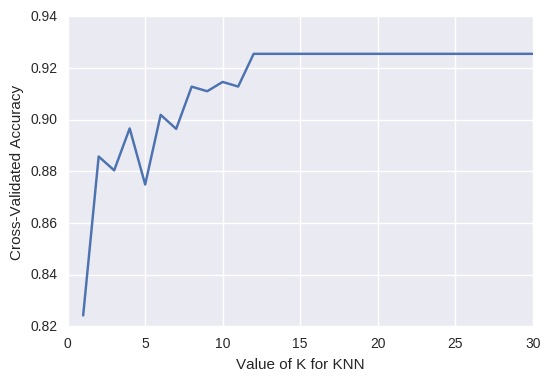

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range, k_scores)

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [22]:
#model selection

In [23]:
knn = KNeighborsClassifier(n_neighbors=6)
print cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean()

0.901878306878


In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

0.925482202982


In [28]:
#feature selection

In [30]:
feature_cols = ['Container_position', 'Water_level', 'Lid', 'Source', 'Meso']
X = data[feature_cols]

TypeError: tuple indices must be integers, not list

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [32]:
scores = cross_val_score(linreg, X, B, cv=10, scoring='mean_squared_error')
print scores

[ -1377.01208812    -96.19510333   -168.98848372    -71.85825255
   -128.77316304 -10897.63526418  -3450.83110422   -318.96211153
   -328.52498656   -120.86789149]


In [33]:
mse_scores = -scores
print mse_scores

[  1377.01208812     96.19510333    168.98848372     71.85825255
    128.77316304  10897.63526418   3450.83110422    318.96211153
    328.52498656    120.86789149]


In [34]:
rmse_scores = np.sqrt(mse_scores)
print rmse_scores

[  37.10811351    9.80791024   12.99955706    8.47692471   11.34782636
  104.39173944   58.74377503   17.85951039   18.12525825   10.99399343]


In [35]:
print rmse_scores.mean()

28.9854608417


In [36]:
feature_cols = ['Water_level']
X = data[feature_cols]

TypeError: tuple indices must be integers, not list

In [46]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
scores = cross_val_score(linreg, X, B, cv=10, scoring='mean_squared_error')
print scores


[ -1377.01208812    -96.19510333   -168.98848372    -71.85825255
   -128.77316304 -10897.63526418  -3450.83110422   -318.96211153
   -328.52498656   -120.86789149]


In [38]:
def train_test_rmse(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [45]:
feature_cols = ['Container_position', 'Water_level', 'Lid', 'Source', 'Meso']
X = data[feature_cols]

TypeError: tuple indices must be integers, not list